In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 1: Load the datasets
accident_file = "kaggle_data/accident_data.csv"
vehicle_accident_file = "kaggle_data/vehicle_data.csv"

df_accident = pd.read_csv(accident_file, encoding='latin1').head(10000)  # First 10,000 rows
df_vehicle = pd.read_csv(vehicle_accident_file, encoding='latin1')

# Step 2: Merge the datasets on the common key
common_key = 'Accident_Index'
common_keys = pd.merge(df_accident, df_vehicle, on=common_key, how='inner')

# Step 3: Clean the data by selecting relevant columns
columns_to_keep = [
    'Accident_Severity', 
    'Did_Police_Officer_Attend_Scene_of_Accident', 
    'Speed_limit', 
    'Time', 
    'Weather_Conditions', 
    'Road_Surface_Conditions', 
    'Engine_Capacity_.CC.', 
    'make',
    'model', 
    'Day_of_Week', 
    'Sex_of_Driver', 
    'Journey_Purpose_of_Driver', 
    'Junction_Location', 
    'Age_Band_of_Driver', 
    'Age_of_Vehicle', 
    'Number_of_Casualties', 
    'Number_of_Vehicles'
]

common_keys_cleaned = common_keys[columns_to_keep]

# Display the cleaned data
print("Cleaned data with selected columns:")
print(f"Number of data on the cleaned data: {len(common_keys_cleaned)}")
print(common_keys_cleaned.head())

#  Save the cleaned data to a new file
cleaned_file = "cleaned_common_accident_vehicle_records.csv"
common_keys_cleaned.to_csv(cleaned_file, index=False)
print(f"Cleaned merged data saved to '{cleaned_file}'")



Cleaned data with selected columns:
Number of data on the cleaned data: 5603
  Accident_Severity  Did_Police_Officer_Attend_Scene_of_Accident  Speed_limit  \
0            Slight                                          1.0           30   
1            Slight                                          1.0           30   
2            Slight                                          1.0           30   
3            Slight                                          1.0           30   
4            Slight                                          1.0           30   

    Time     Weather_Conditions Road_Surface_Conditions  Engine_Capacity_.CC.  \
0  17:36     Fine no high winds                     Dry                8268.0   
1  00:15     Fine no high winds                     Dry                8300.0   
2  10:35     Fine no high winds                     Dry                1769.0   
3  21:13     Fine no high winds             Wet or damp                  85.0   
4  12:40  Raining no high winds

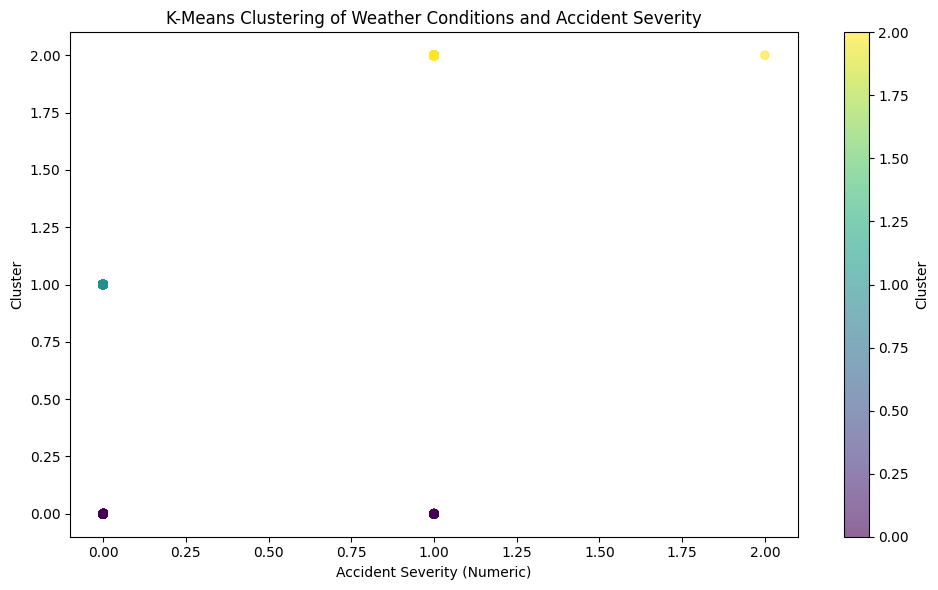

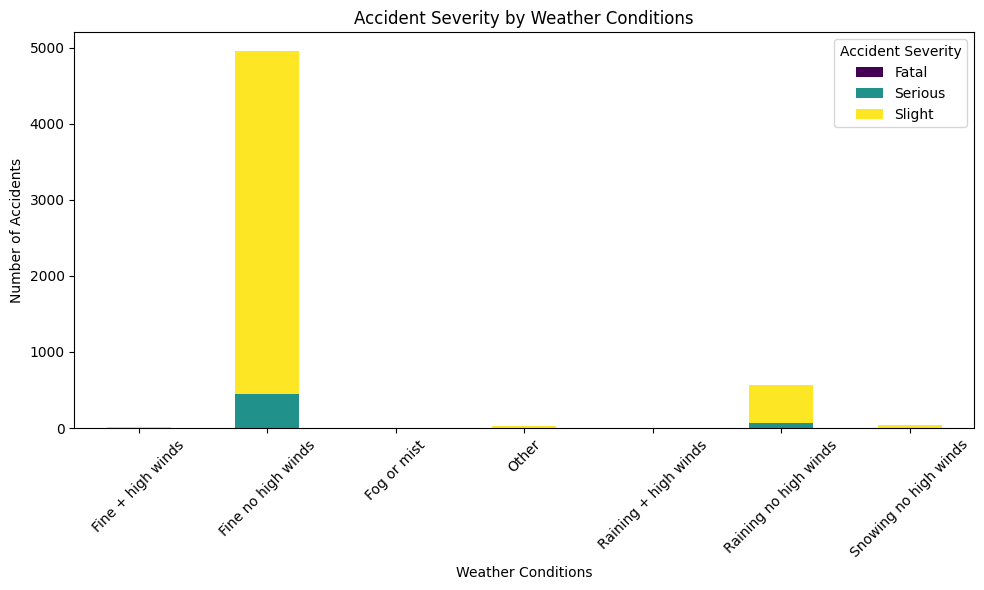

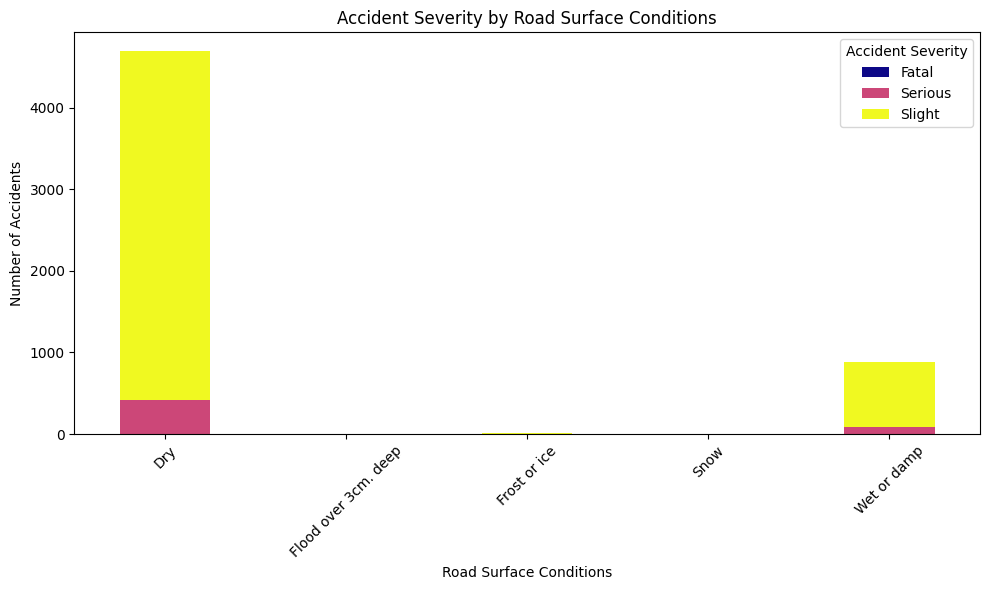

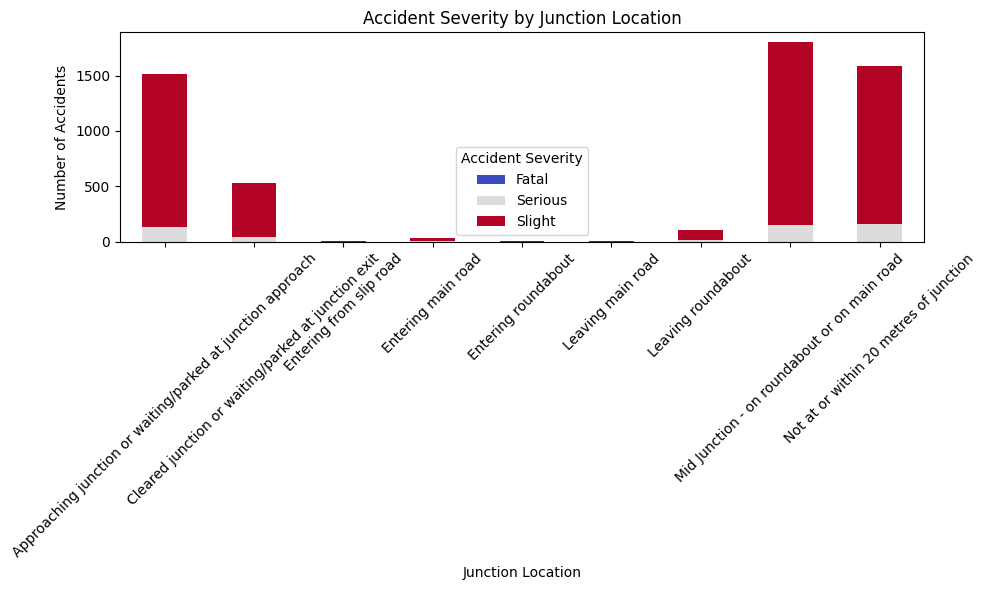

Analysis completed and visualizations generated.


In [4]:
# Step 5: Prepare data for analysis
environmental_columns = ['Weather_Conditions', 'Road_Surface_Conditions', 'Junction_Location', 'Accident_Severity']
data = common_keys_cleaned[environmental_columns].dropna()

# Map Accident Severity to numeric values
severity_mapping = {"Slight": 0, "Serious": 1, "Fatal": 2}
data['Severity_Numeric'] = data['Accident_Severity'].map(severity_mapping)

# Convert Weather_Conditions into dummy variables
weather_conditions_numeric = pd.get_dummies(data['Weather_Conditions'], prefix='Weather')

# Combine Weather Conditions and Severity for clustering
clustering_data = pd.concat([weather_conditions_numeric, data['Severity_Numeric']], axis=1)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data)

# Step 6: Visualize clustering results
plt.figure(figsize=(10, 6))
plt.scatter(
    clustering_data['Severity_Numeric'], 
    clustering_data['Cluster'], 
    c=clustering_data['Cluster'], cmap='viridis', alpha=0.6
)
plt.title('K-Means Clustering of Weather Conditions and Accident Severity')
plt.xlabel('Accident Severity (Numeric)')
plt.ylabel('Cluster')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# Step 7: Analysis 1 - Weather Conditions vs Accident Severity
weather_severity = data.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack(fill_value=0)

# Visualize Weather Conditions vs Accident Severity
weather_severity.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Accident Severity by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 8: Analysis 2 - Road Surface Conditions vs Accident Severity
road_surface_severity = data.groupby(['Road_Surface_Conditions', 'Accident_Severity']).size().unstack(fill_value=0)

# Visualize Road Surface Conditions vs Accident Severity
road_surface_severity.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title('Accident Severity by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 9: Analysis 3 - Junction Location vs Accident Severity
junction_location_severity = data.groupby(['Junction_Location', 'Accident_Severity']).size().unstack(fill_value=0)

# Visualize Junction Location vs Accident Severity
junction_location_severity.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Accident Severity by Junction Location')
plt.xlabel('Junction Location')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 10: Save the processed analysis results to CSV files
weather_severity.to_csv("weather_vs_severity.csv")
road_surface_severity.to_csv("road_surface_vs_severity.csv")
junction_location_severity.to_csv("junction_location_vs_severity.csv")

print("Analysis completed and visualizations generated.")
